In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

import numpy as np
import os
import PIL
import PIL.Image

In [2]:
import sys, os

In [3]:
sys.path

['c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles\\vscode_datascience_helpers',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles\\lib\\python',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib',
 'C:\\Users\\xyang\\AppData\\Roamin

In [4]:
import pandas as pd 
df = pd.read_csv("train_set.csv")
df.head()

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg


In [5]:
df_test = pd.read_csv("test_set.csv")
df_test.head()

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg


In [6]:
df_submission = pd.read_csv("sample_submission.csv")
df_submission.head()

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,happy
3,15968,happy
4,18382,happy


In [7]:
batch_size = 32 # Entrena de 32 en 32
img_height = 48
img_width = 48

data_dir = 'c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY\\train'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6176 files belonging to 2 classes.


In [8]:
train_ds.class_names

['happy', 'sadness']

In [9]:
(train_images, train_labels) = train_ds

ValueError: too many values to unpack (expected 2)

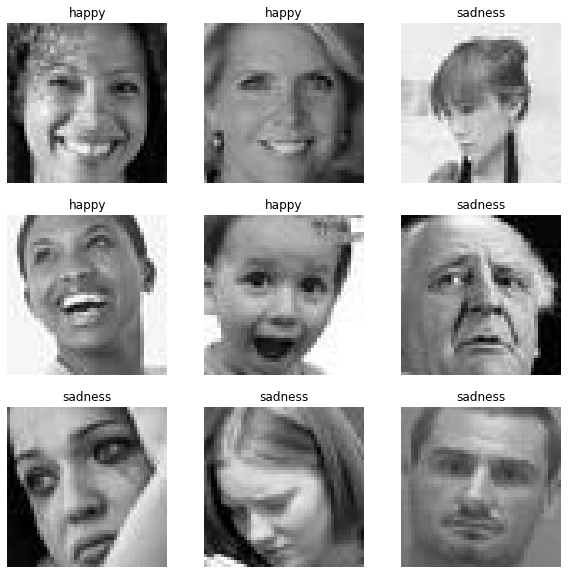

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")